In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [3]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = "/content/drive/MyDrive/archive (22)/Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)


In [11]:
data['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

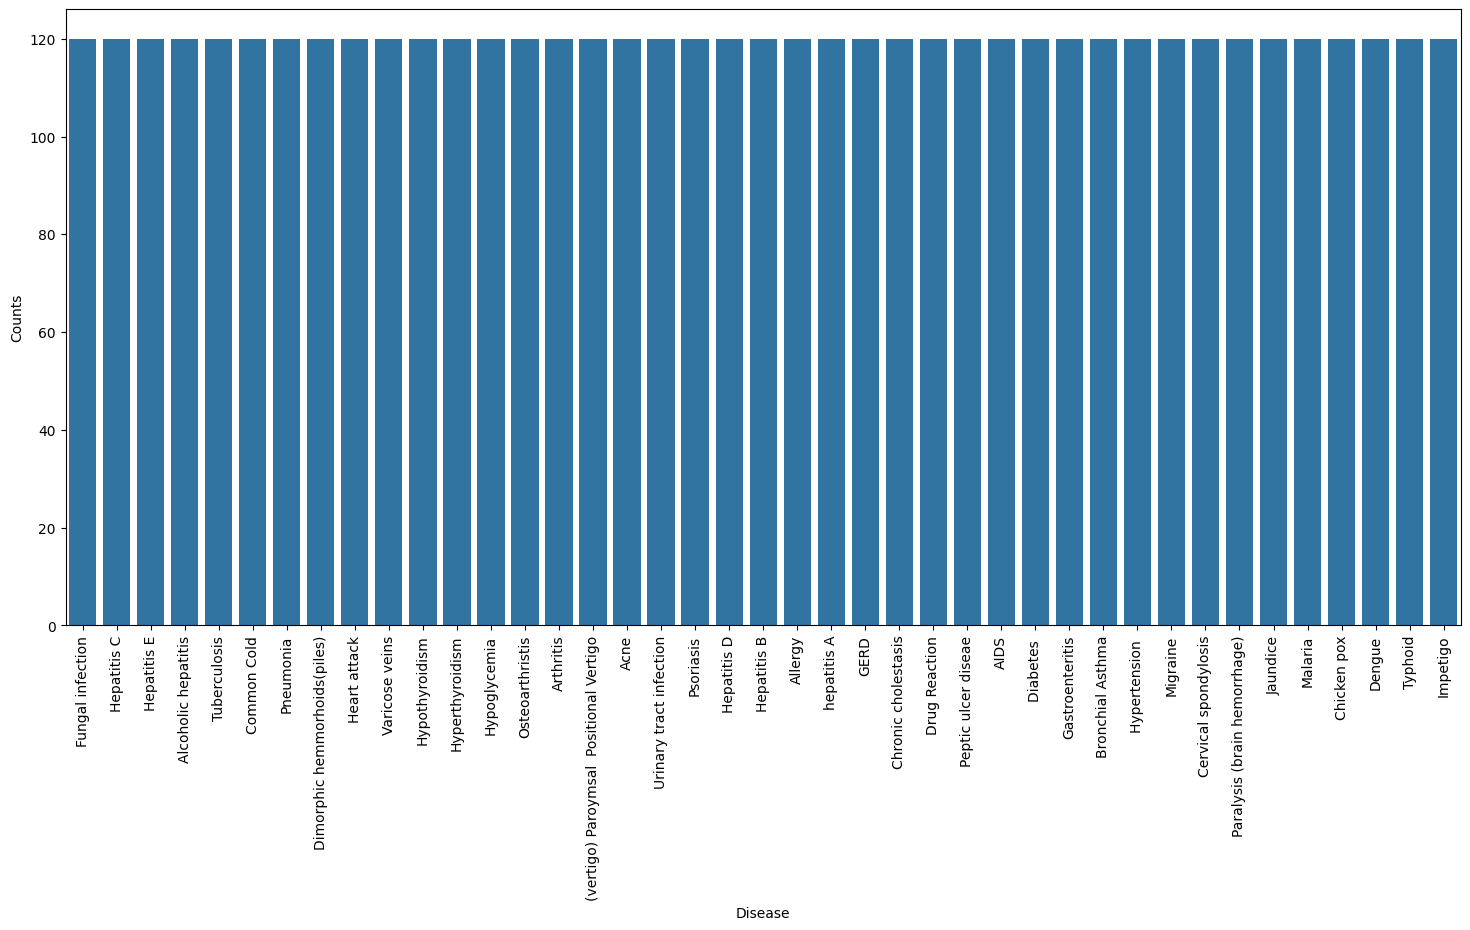

In [12]:
# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [6]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.shape

(4920, 133)

In [16]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [17]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [24]:
# Defining scoring metric for k-fold cross validation
def customscoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = customscoring)
    print("..."*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

..........................................................................................
SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
..........................................................................................
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
..........................................................................................
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier: 100.00%
Accuracy on test data by SVM Classifier: 100.00%


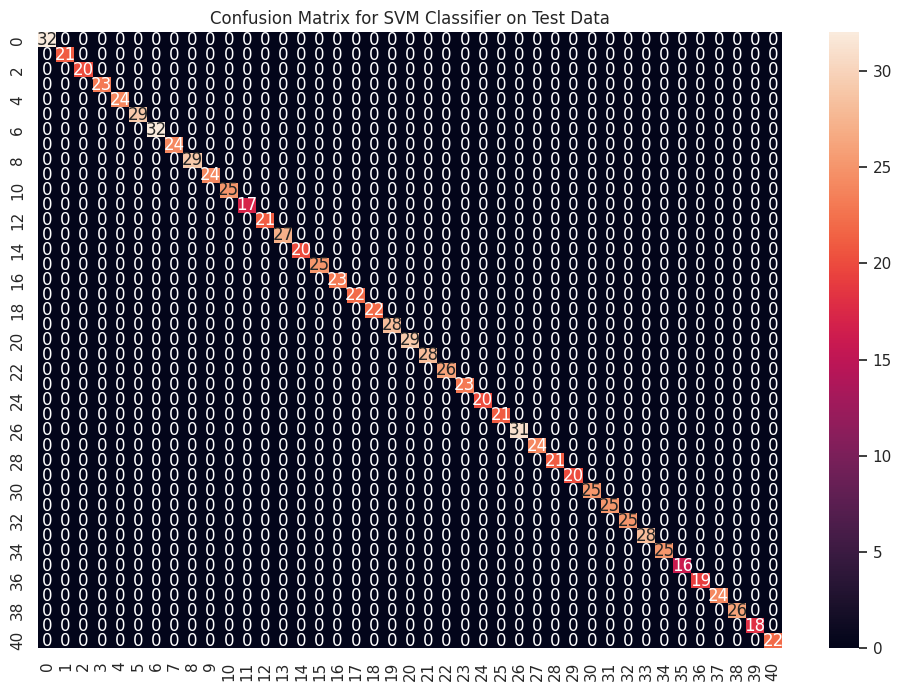

Accuracy on train data by Naive Bayes Classifier: 100.00%
Accuracy on test data by Naive Bayes Classifier: 100.00%


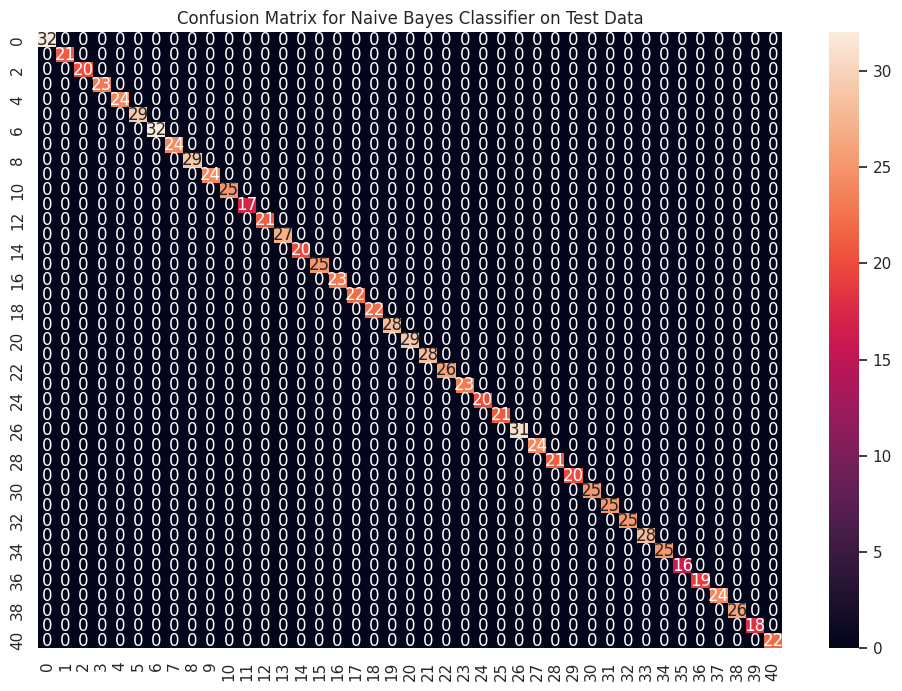

Accuracy on train data by Random Forest Classifier: 100.00%
Accuracy on test data by Random Forest Classifier: 100.00%


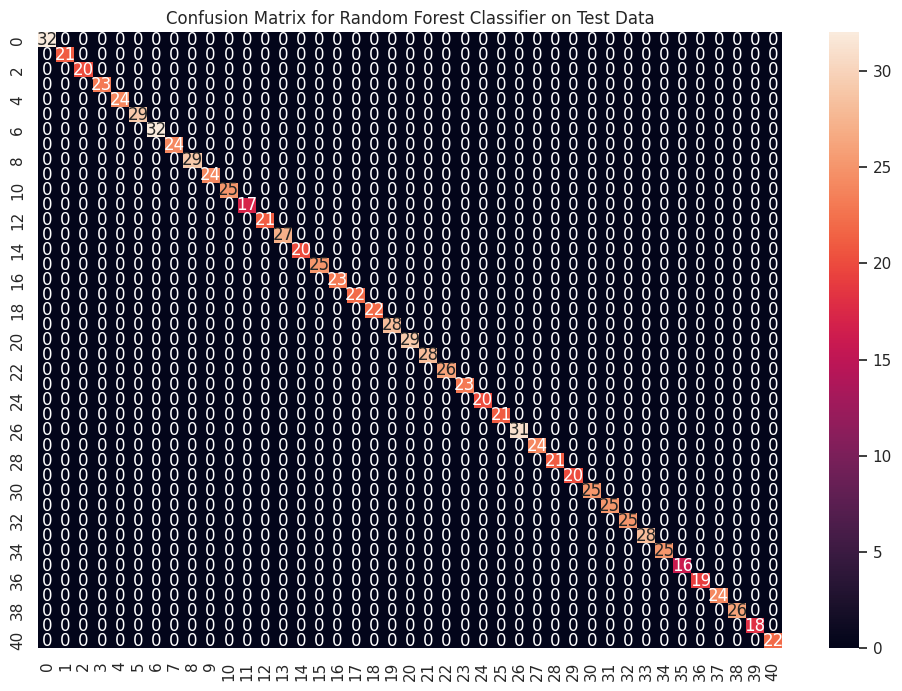

In [25]:

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Accuracy on train data by {model_name}: {train_accuracy * 100:.2f}%")
    print(f"Accuracy on test data by {model_name}: {test_accuracy * 100:.2f}%")
    cf_matrix = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf_matrix, annot=True)
    plt.title(f"Confusion Matrix for {model_name} on Test Data")
    plt.show()

# SVM Classifier
svm_model = SVC()
train_and_evaluate_model(svm_model, X_train, y_train, X_test, y_test, "SVM Classifier")

# Naive Bayes Classifier
nb_model = GaussianNB()
train_and_evaluate_model(nb_model, X_train, y_train, X_test, y_test, "Naive Bayes Classifier")

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest Classifier")

In [28]:
print("Length of svm_preds:", len(svm_preds))
print("Length of nb_preds:", len(nb_preds))
print("Length of rf_preds:", len(rf_preds))

# Check the first few values of each array
print("svm_preds:", svm_preds[:5])
print("nb_preds:", nb_preds[:5])
print("rf_preds:", rf_preds[:5])


Length of svm_preds: 42
Length of nb_preds: 42
Length of rf_preds: 42
svm_preds: [15  4 16  9 14]
nb_preds: [15  4 16  9 14]
rf_preds: [15  4 16  9 14]


Accuracy on Test dataset by the combined model: 100.00%


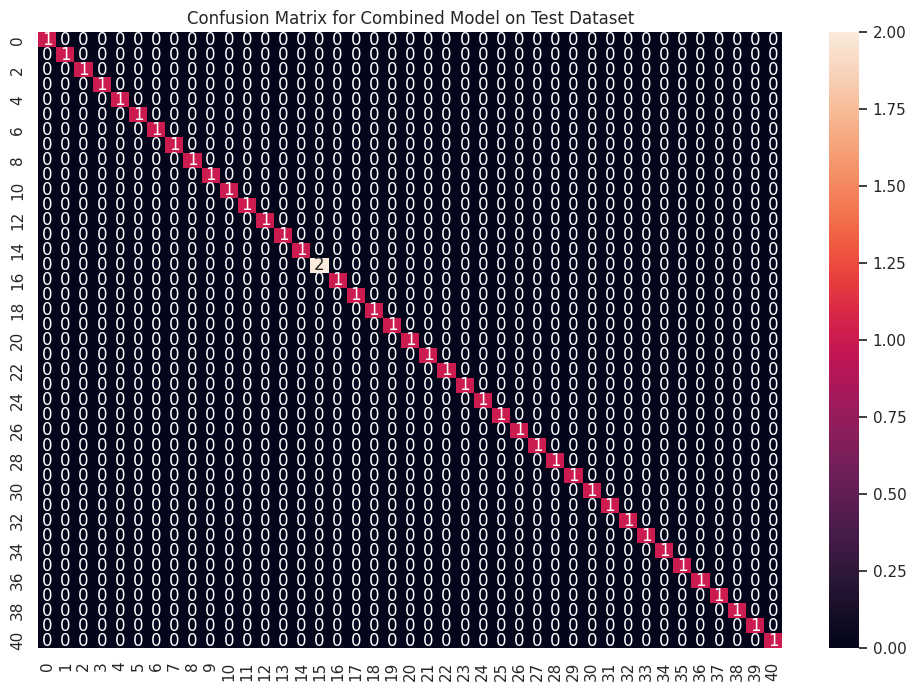

In [29]:
from statistics import mode as stat_mode


# Train final models on the whole dataset
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Read the test data
test_data = pd.read_csv("/content/drive/MyDrive/archive (22)/Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Make predictions by taking mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [stat_mode([i, j, k]) for i, j, k in zip(svm_preds, nb_preds, rf_preds)]
# Evaluate the combined model
accuracy_combined_model = accuracy_score(test_Y, final_preds)
print(f"Accuracy on Test dataset by the combined model: {accuracy_combined_model * 100:.2f}%")

# Visualize the confusion matrix
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [36]:
def predict_disease(symptoms, models, symptom_index, encoder, feature_names):
    symptoms = symptoms.split(",")

    # Creating input data for the models
    input_data = [0] * len(symptom_index)
    for symptom in symptoms:
        index = symptom_index.get(capitalize_symptom(symptom))
        if index is not None:
            input_data[index] = 1

    # Reshaping the input data for model predictions
    input_data = np.array(input_data).reshape(1, -1)

    # Setting feature names for the input data
    input_data_named = pd.DataFrame(input_data, columns=feature_names)

    # Predictions for each model
    predictions = {}
    for model_name, model in models.items():
        model_prediction = encoder.classes_[model.predict(input_data_named)[0]]
        predictions[model_name] = model_prediction

    # Finding the final prediction
    final_prediction = find_mode(predictions.values())

    # Adding final prediction to the dictionary
    predictions["final_prediction"] = final_prediction

    return predictions

# Function to take symptom input from the user and make predictions
def make_predictions():
    symptoms_input = input("Enter symptoms separated by commas: ")

    # Predictions for RandomForestClassifier
    rf_prediction = predict_disease(symptoms_input, models, symptom_index, encoder, feature_names)

    # Predictions for GaussianNB
    nb_prediction = predict_disease(symptoms_input, models, symptom_index, encoder, feature_names)

    # Predictions for SVC
    svm_prediction = predict_disease(symptoms_input, models, symptom_index, encoder, feature_names)

    # Print predictions
    print("Random Forest Classifier prediction:", rf_prediction)
    print("Gaussian Naive Bayes prediction:", nb_prediction)
    print("Support Vector Classifier prediction:", svm_prediction)
    print("Final prediction (mode):", rf_prediction["final_prediction"])

# Example usage:
make_predictions()


Enter symptoms separated by commas: dizziness,loss_of_balance,lack_of_concentration
Random Forest Classifier prediction: {'rf_model': 'Hypertension ', 'nb_model': 'Hypertension ', 'svm_model': 'Hypertension ', 'final_prediction': 'Hypertension '}
Gaussian Naive Bayes prediction: {'rf_model': 'Hypertension ', 'nb_model': 'Hypertension ', 'svm_model': 'Hypertension ', 'final_prediction': 'Hypertension '}
Support Vector Classifier prediction: {'rf_model': 'Hypertension ', 'nb_model': 'Hypertension ', 'svm_model': 'Hypertension ', 'final_prediction': 'Hypertension '}
Final prediction (mode): Hypertension 
